# ASSESSMENT 3: Bike Sharing

## 1. Business Objectives

Bike sharing systems allow a user to rent a bike from one location and return it to another. The rental beahviour of users can be affected by weather conditions or environmental settings. In our case we are trying to find links between user renting behaviour, the day of the week and the weather of the day. 

The main assumption laid out in this task is that current user renting behaviour does not influence future behaviour i.e. the number of rentals made in a day does not affecte the number of rentals made the day after. Any fluctuation of number of rentals will solely be attributed to weather patterns and other external changes. 

### 1.1 Assessing the situation

- **Personel** - The study will be conducted by a data specialist. All stages from data acquisition to modelling shall be tasked to the specialist.
- **Data** - The dataset to be used will be from the [UCI ML repository](https://archive.ics.uci.edu/ml/index.php) bike sharing dataset. With focus beign on the <mark>daily count dataset</mark>.
- **Computing Resources** - We will use Google Colab with 4 GB of memory available.
- **Software** - Python 3.6 will be used with extensive use of the pandas, seaborn, matplotlib and scikit libraries.


## 2. Data Understanding

### 2.1 Data Acquisition

In [2]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes= True)

Import our libraries and set some program options

In [3]:

import requests
from zipfile import ZipFile
from io import BytesIO

r = requests.get(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip")
z = ZipFile(BytesIO(r.content))
bike_data = pd.read_csv(z.open("day.csv"))

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Get our data from a url and look at the first 5 rows

### 2.2 Describe our data

In [4]:
bike_data.shape

(731, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


We see that the data is comprised of numeric values except for the date field which is an object.

In [6]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 2.3 Verify Data

In [7]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We have no missing values.

### 2.4 Exploratory Data Analysis

Some modifications will be made to the dataset before proceeding to exploratory analysis. The main change will be dropping columns that will not be necessary going forward.

In [8]:
bike_data.drop(columns=['dteday', 'casual', 'registered', 'instant'], inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


We drop the date column alongside the registered, instant, and casual columns.

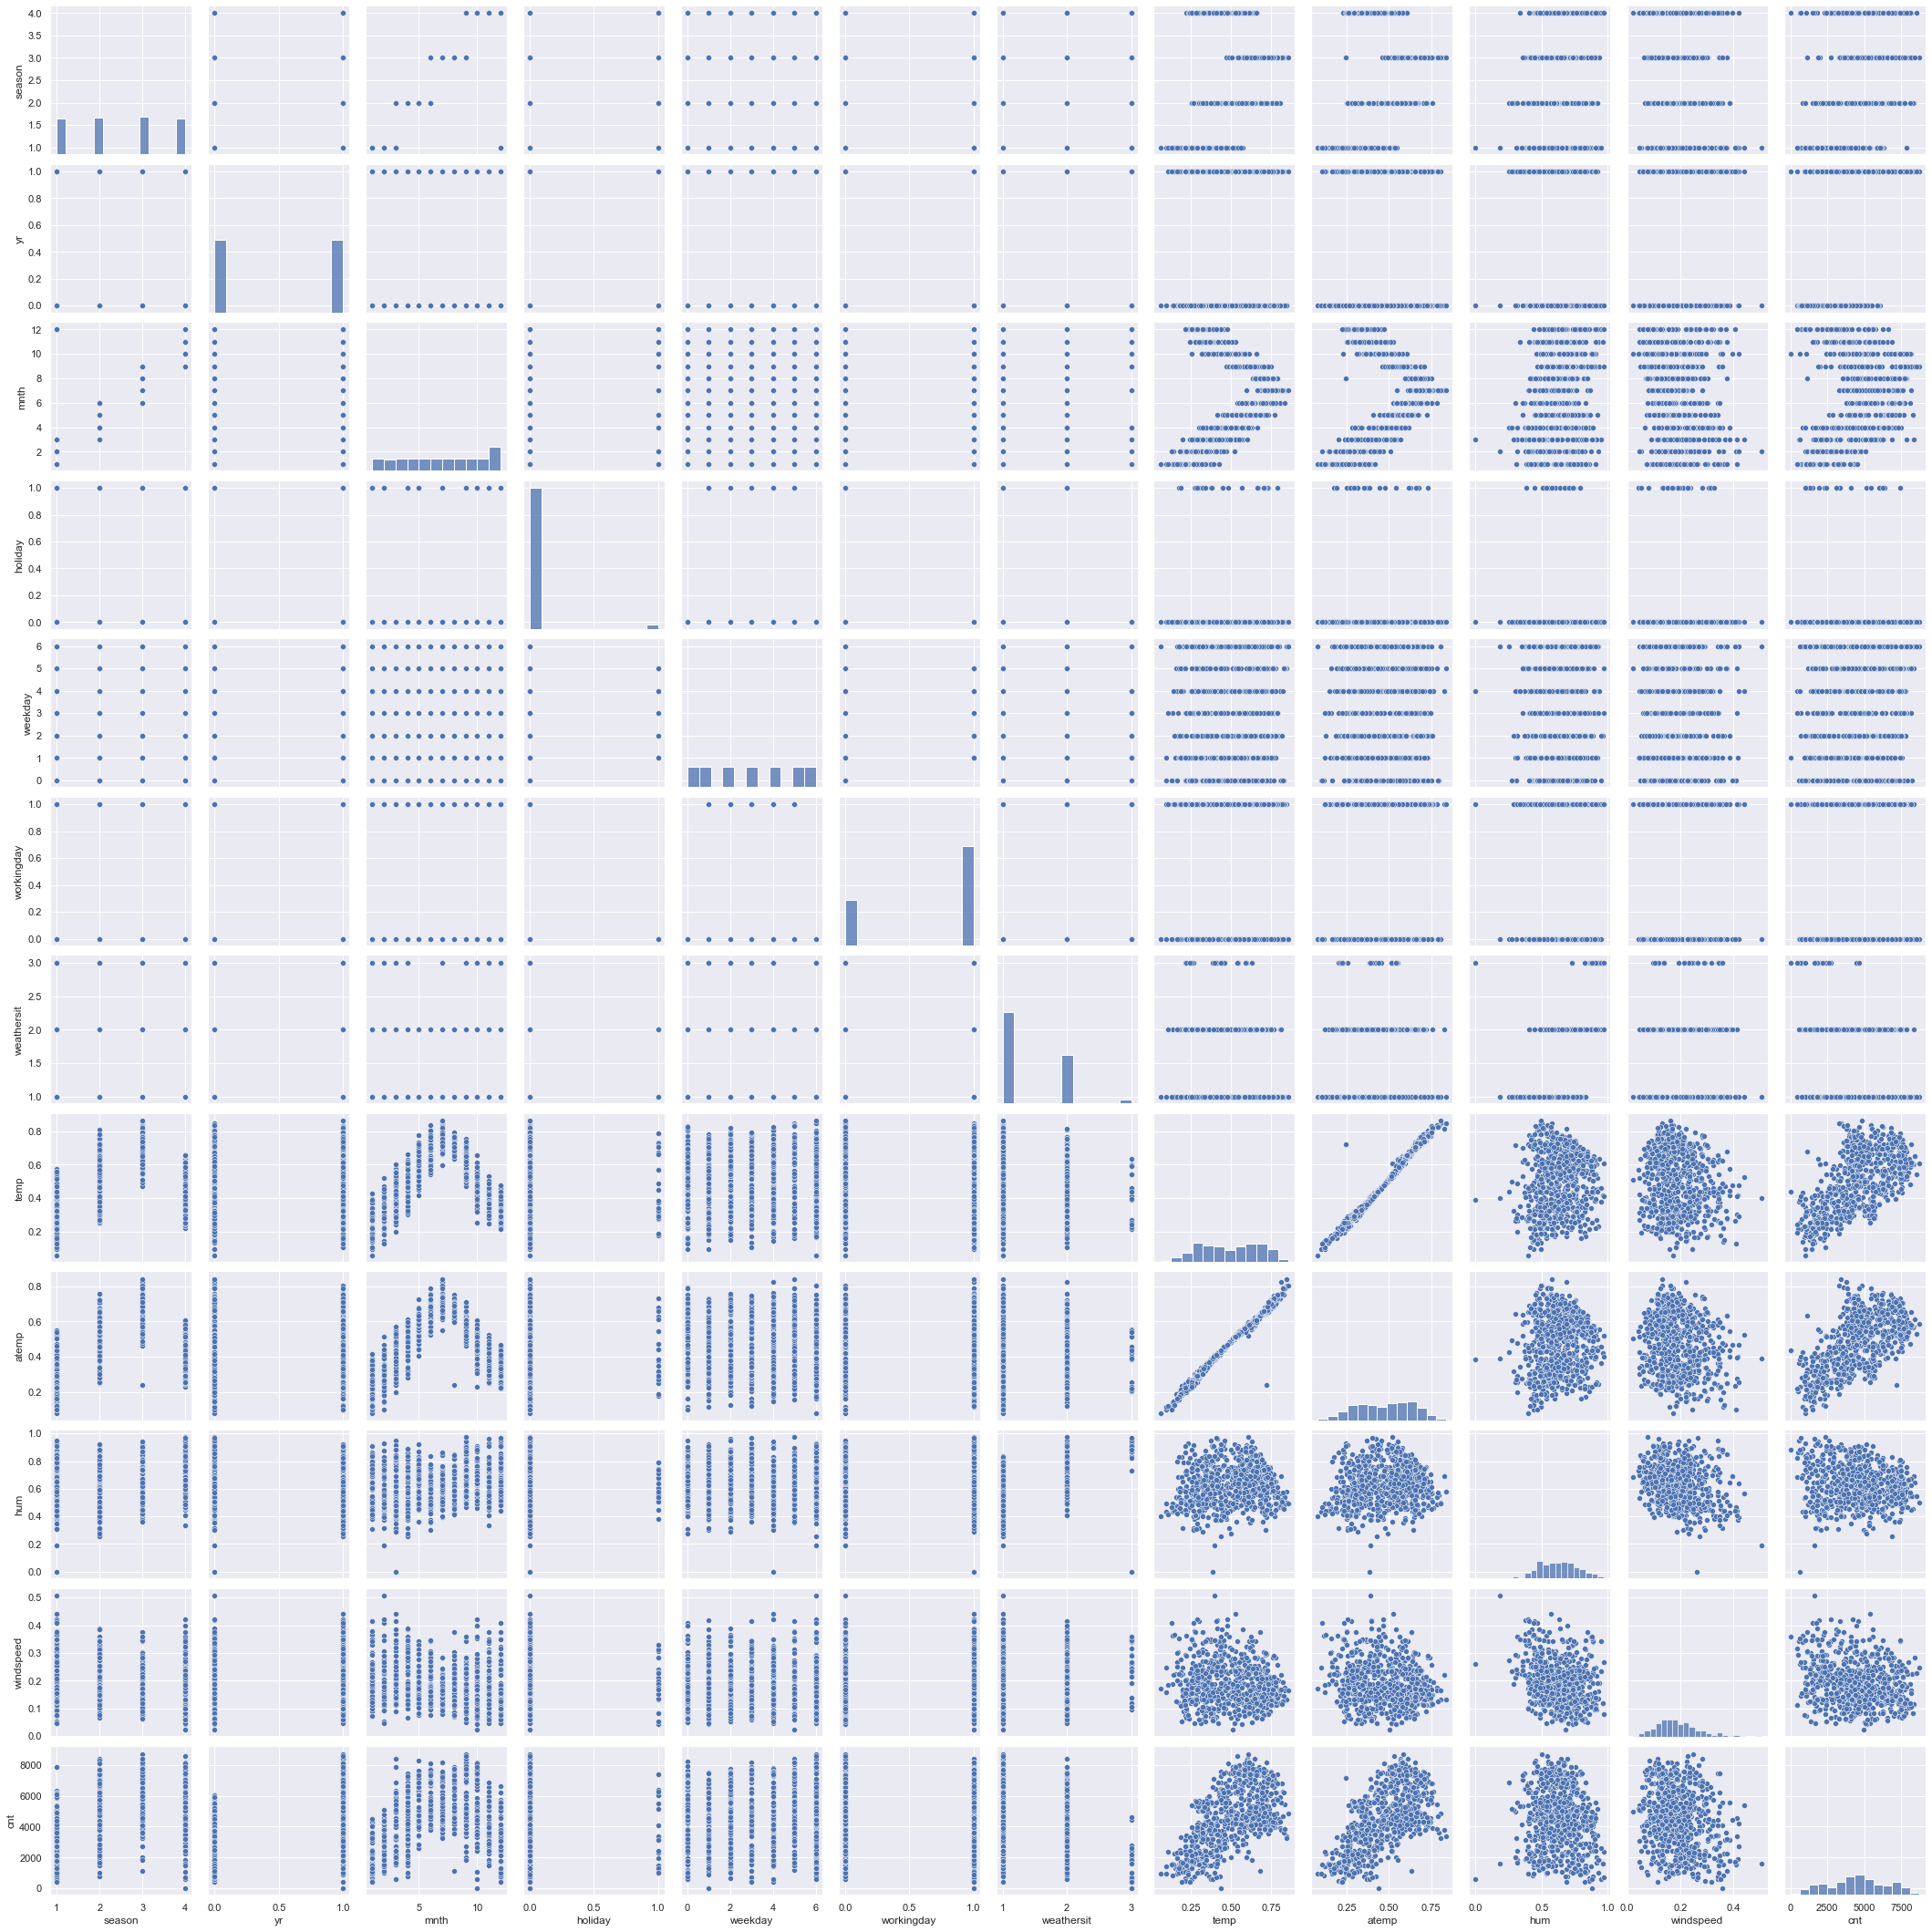

In [9]:
sns.pairplot(bike_data)

What we can observe from the pairplot is a positive correlation between temperature and rent counts. Humidity and windspeed indicate no correlation to speak of.

<AxesSubplot:xlabel='yr', ylabel='cnt'>

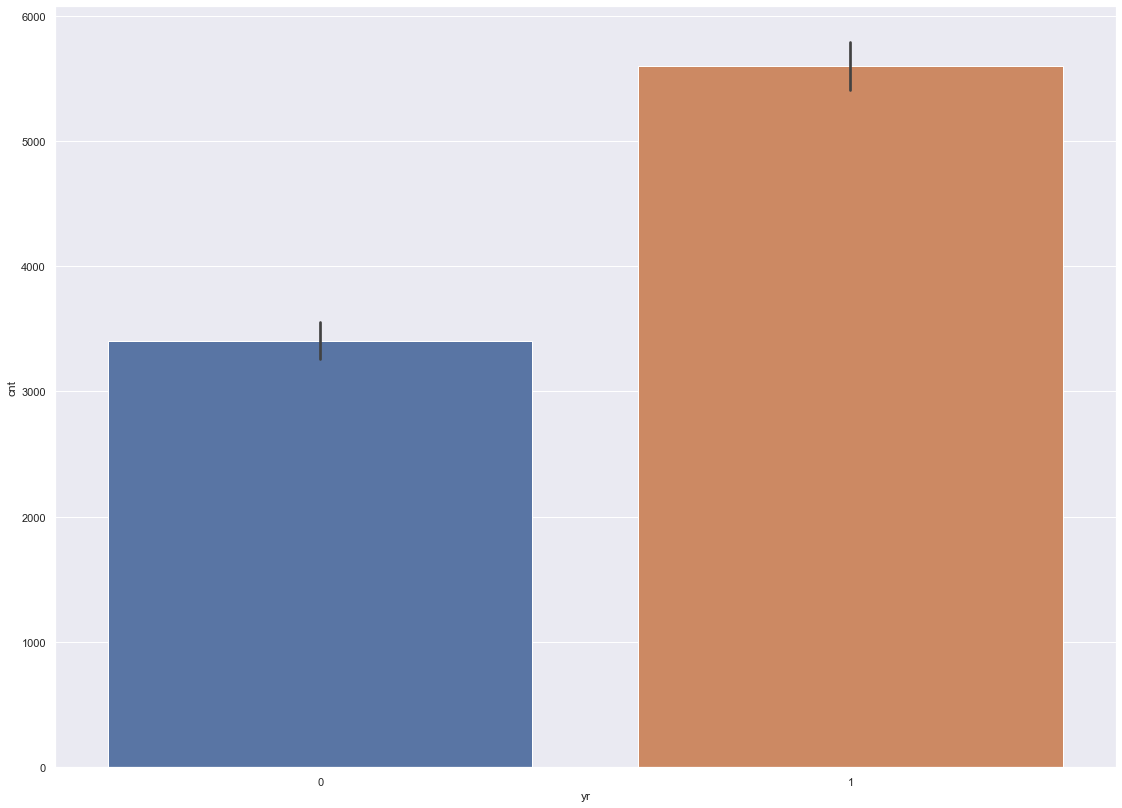

In [10]:
fig = plt.figure(figsize=(19, 14))
sns.barplot(data=bike_data,x='yr', y='cnt')

The year 2012 had far more rentals than 2011. 

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

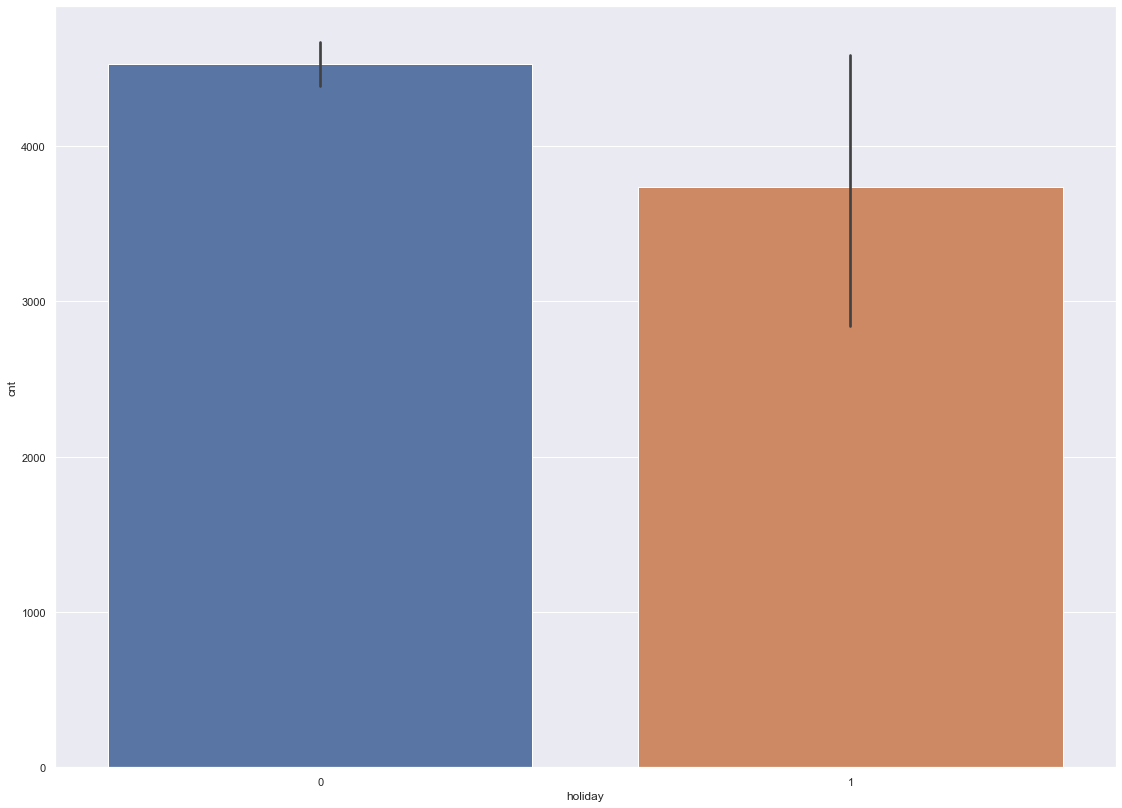

In [11]:
fig = plt.figure(figsize=(19, 14))
sns.barplot(data=bike_data,x='holiday', y='cnt')

We see more rentals on non-holidays than holidays.

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

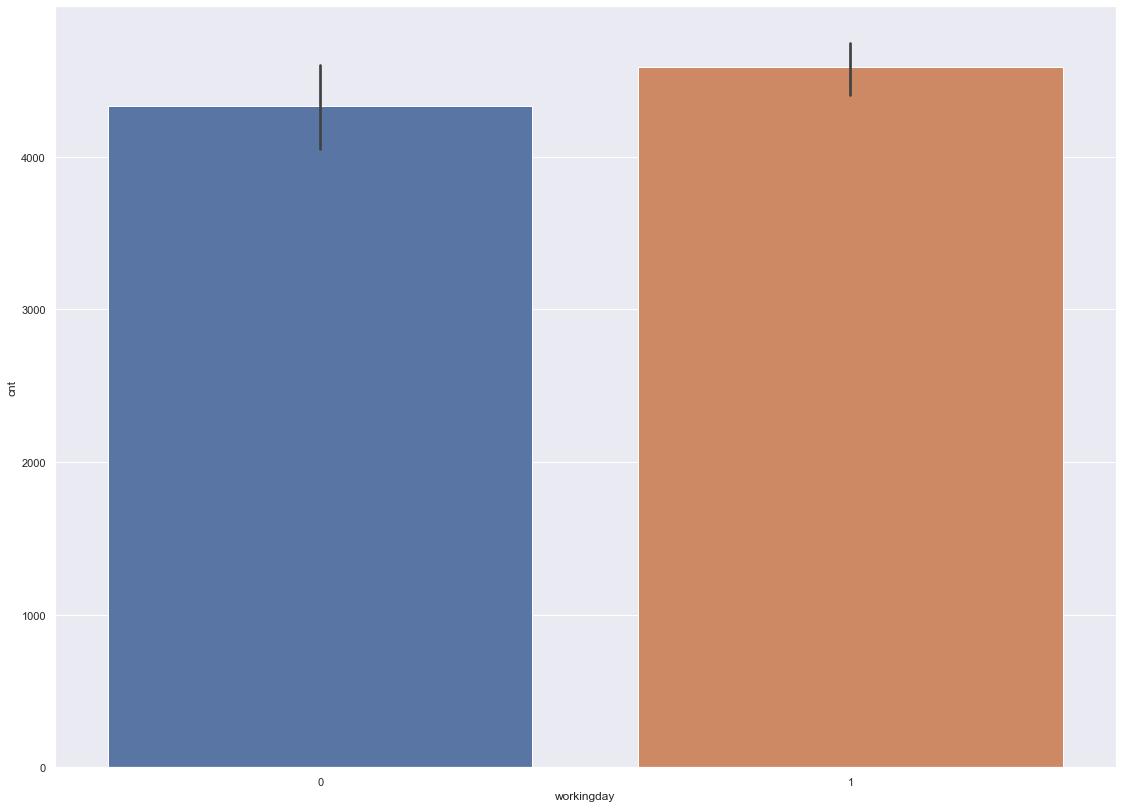

In [12]:
fig = plt.figure(figsize=(19, 14))
sns.barplot(data=bike_data,x='workingday', y='cnt')

Also more rentals on working days

<AxesSubplot:xlabel='season', ylabel='cnt'>

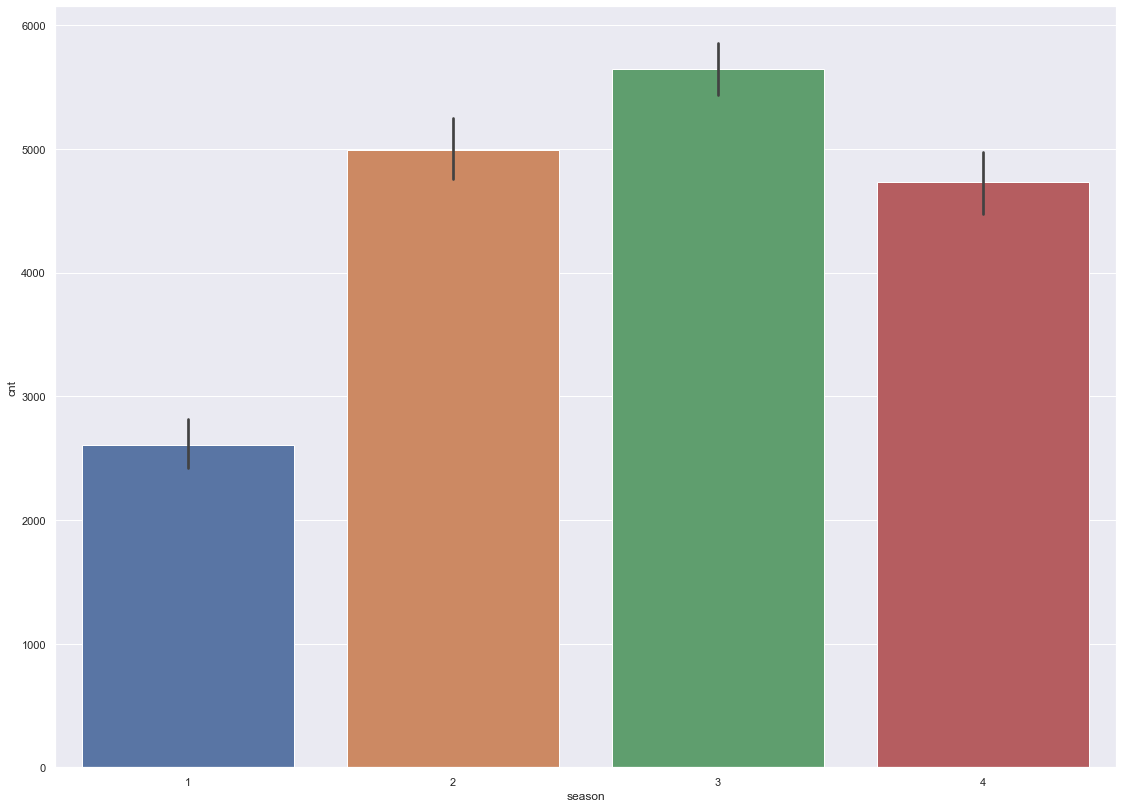

In [13]:
fig = plt.figure(figsize=(19, 14))
sns.barplot(data=bike_data,x='season', y='cnt')

<Figure size 1368x1008 with 0 Axes>

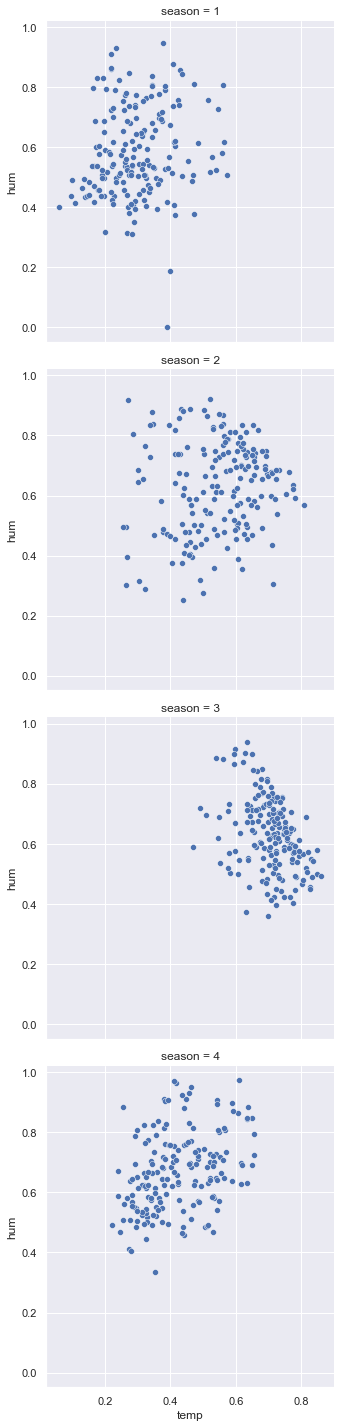

In [14]:
fig = plt.figure(figsize=(19, 14))
sns.relplot(data=bike_data, x='temp',y='hum', row='season')

When looking at the relationship between the seasons and rental counts, spring has the lowest while fall has the highest. An explanation for this can be seen in the relationship plot directly above which tells us that spring is a cold season while fall was the warmest. Thus warm days are an indicator for the number of rentals.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

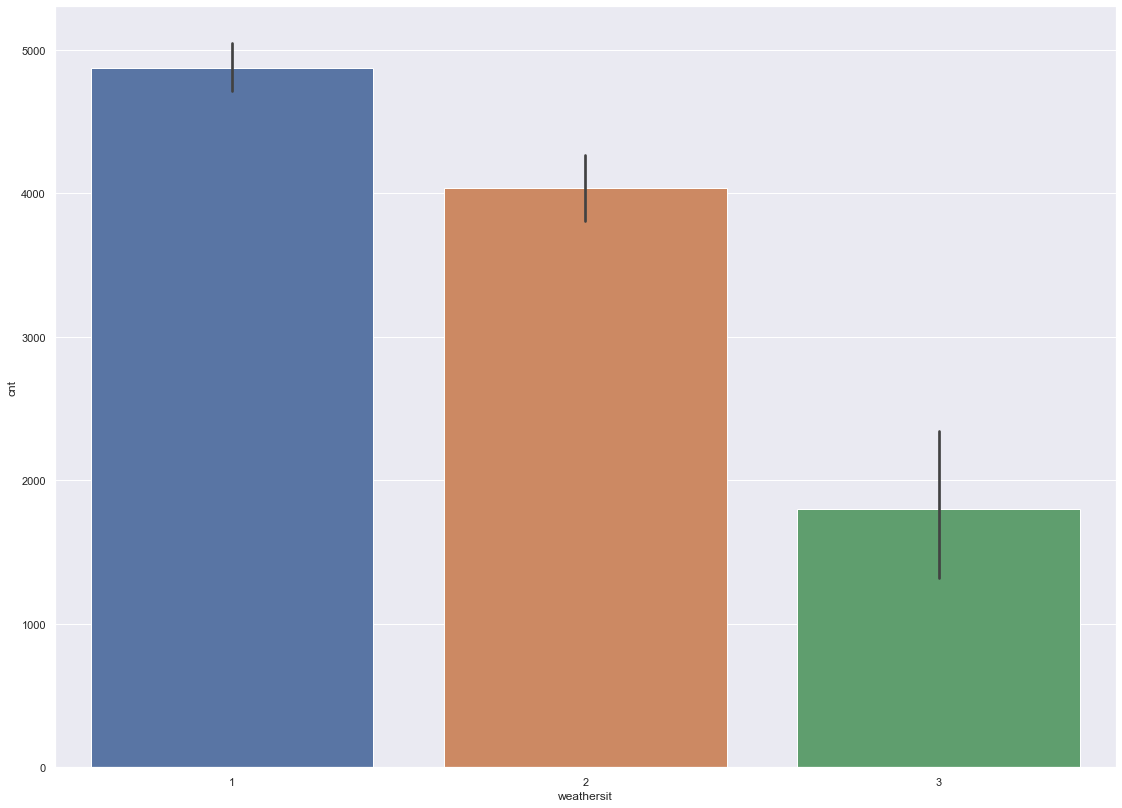

In [15]:
fig = plt.figure(figsize=(19, 14))
sns.barplot(data=bike_data,x='weathersit', y='cnt')

<AxesSubplot:xlabel='count', ylabel='season'>

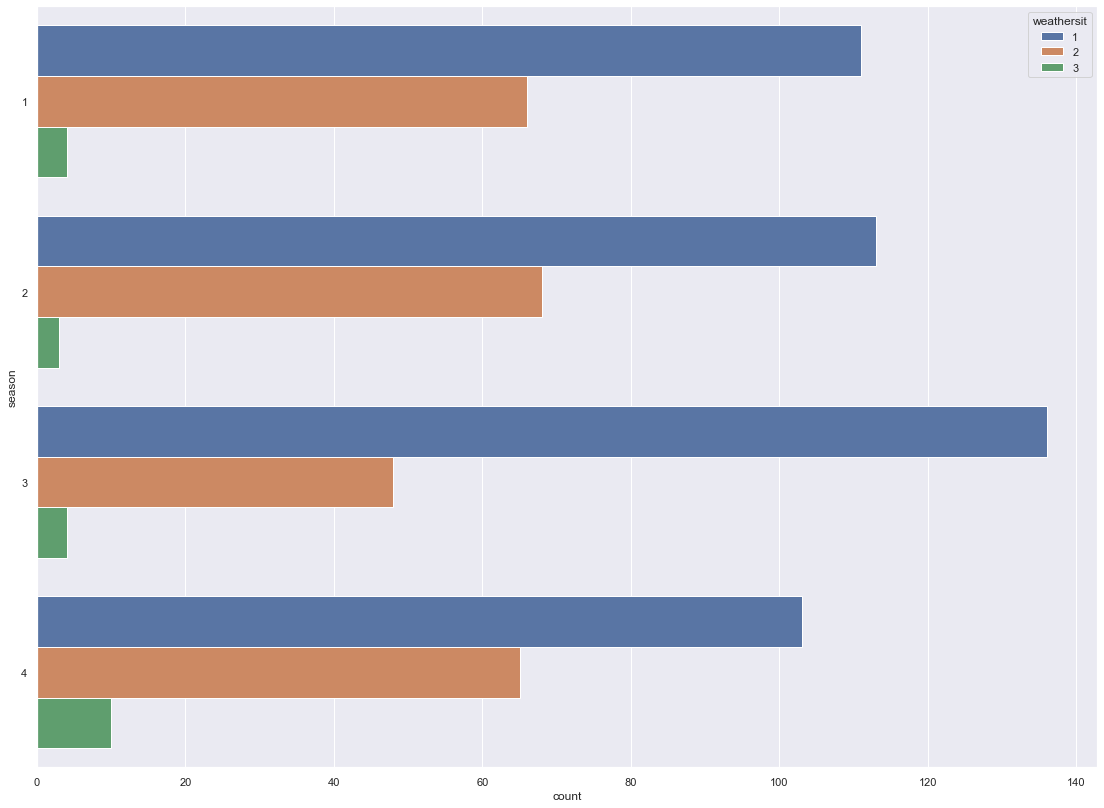

In [16]:
fig = plt.figure(figsize=(19, 14))
sns.countplot(data=bike_data, y='season', hue='weathersit')

Following from the discussion about seasons, when looking at weather situation the naarative does not hold. We know weathersit 1 corresponds with more counts of bikes rented. However, despite spring recording more observation of weather type 1 than winter we still saw that it had less bike rentals. Then again, fall did also record the most observations for weather 1.


An explanation for this would be probably there were more working days in winter than spring. But this is all conjencture.

Final remarks on the exploratory analysis:
1. Weather conditions seem to be an adequate predictor for bike rentals alongside workingdays.
2. Temperature seems more reliable than other observations like windspeed and humidity
3. Though not mentioned above, the collineraility between atemp and temp needs to be addressed.

## 3. Data preparation

### 3.1 Selecting data

Previously we had discarded some of our columns as they did not contribute sufficiently. Following that we will select features for an optimal model.


In [17]:
from sklearn.model_selection import train_test_split
data = bike_data.values # Read our values into an array
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state=42,shuffle=True) 

Becuase of the symmetry in our data, the observation coming from the years 2011 and 2012, we split the train and test sets equally. The data is shuffled to ensure diversity in observations for each set

In [18]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# feature selection
def select_features(X_train, y_train, X_test, n_features, func):
	fs = SelectKBest(score_func=func, k=n_features)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train data
	X_train_fs = fs.transform(X_train)
	# transform test data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train_fs, X_test_fs, fs =select_features(X_train,y_train, X_test,'all', mutual_info_regression)


We use the SelectKBest algorithm with `mutual_info_regression` as our scoring function.

In [19]:
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 0.293175
Feature 1: 0.260582
Feature 2: 0.335695
Feature 3: 0.000211
Feature 4: 0.061959
Feature 5: 0.061651
Feature 6: 0.081112
Feature 7: 0.365149
Feature 8: 0.486408
Feature 9: 0.082469
Feature 10: 0.098876


We see some of our important features include atemp, mnth and season

In [20]:
X_train_fs, X_test_fs, fs = select_features(X_train,y_train, X_test,5, mutual_info_regression)

Next we use our feature selection funtion but only with 5 features

## 4. Modelling

### 4.1 Importing the model

In [21]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
import numpy as np

### 4.2 Model assumptions.

We are using the Ridge regressor with built in cross-validation for optimal values of `alphas`. This will spped up the tuning of our hyper-parameters. 

### 4.3 Build Model

In [22]:
model = RidgeCV(alphas=np.logspace(-6, 6, 13))

model.fit(X_train_fs, y_train)
y_hat = model.predict(X_test_fs)

print(f'Error: {mean_absolute_error(y_test, y_hat)}')
print(f'Accuracy: {model.score(X_test_fs,y_test)}')
print(f'alpha value: {model.alpha_}')


Error: 751.9633608886769
Accuracy: 0.7184855923569575
alpha value: 0.01


The regressor performs adequately well with an error of 751 and accuracy of 71.8 %

### 4.4 Assess Model

In [23]:
model.coef_

array([  531.84879345,  2002.06196623,   -64.7209388 , -4649.05209261,
       11853.99600775])

We look at the weight vectors and see some coefficients were negative. Of note is the temp coefficient which is negative despite having observed a positive correlation with the output variable. This may be an effect of the collinearility with atemp.

### Model 2 

For the next model we will interpret the problem as a classification problem.

In [24]:
min_value = bike_data['cnt'].min()
max_value = bike_data['cnt'].max()
bins = np.linspace(min_value, max_value, 4)
labels = ['low', 'average', 'high']
bike_data['demand'] = pd.cut(bike_data['cnt'], bins=bins,
                    labels=labels, include_lowest=True)



We create 3 bins for our count data: low, average and high, split our data in the bins and create a new column called demand

(array([167., 370., 194.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

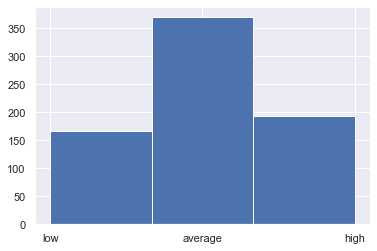

In [25]:
plt.hist(bike_data['demand'], bins=3)


When looking at the new classes made we see an imbalance with the average having far more observations than the other two classes.

In [26]:
bike_data.drop(columns='cnt', inplace=True) # Drop the cnt column as it is no longer needed

In [27]:
from sklearn.model_selection import train_test_split
data = bike_data.values # Read our values into an array
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state=42,shuffle=True) 

In [28]:
from sklearn.feature_selection import mutual_info_classif
X_train_fs, X_test_fs, fs =select_features(X_train,y_train, X_test,'all', mutual_info_classif)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.250516
Feature 1: 0.246767
Feature 2: 0.262168
Feature 3: 0.061664
Feature 4: 0.035743
Feature 5: 0.000000
Feature 6: 0.069442
Feature 7: 0.279110
Feature 8: 0.305878
Feature 9: 0.049157
Feature 10: 0.062739


In [29]:
X_train_fs, X_test_fs, fs =select_features(X_train,y_train, X_test,5, mutual_info_classif)

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

tuned_parameters = [
    {"max_depth": [3,4,5,6,7], "n_estimators": [100,150,200,250], "learning_rate": [0.1, 0.01, 0.001]}
] # Define parameters for tuning

xg_class = GridSearchCV(GradientBoostingClassifier(criterion='mae'),tuned_parameters,scoring='neg_log_loss')

We will use an exhaustive search to find optimal parameters for our estimator. The estimator is a GradientBoosting. For the scoring we select neg_log_loss which is appropriate for our multiclass problem.

In [30]:
xg_class.fit(X_train_fs, y_train)

c:\Users\Linus\Environments\vax\lib\site-packages\sklearn\ensemble\_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
c:\Users\Linus\Environments\vax\lib\site-packages\sklearn\ensemble\_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.
  warnings.warn(
c:\Users\Linus\Environments\vax\lib\site-packages\sklearn\ensemble\_gb.py:1284: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). Use criterion='friedman_mse' or 'squared_error' instead, as trees should use a squared error criterion in Gradient Boosting.


GridSearchCV(estimator=GradientBoostingClassifier(criterion='absolute_error'),
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001],
                          'max_depth': [3, 4, 5, 6, 7],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='neg_log_loss')

In [32]:
y_hat = xg_class.predict(X_test_fs)

# evaluate predictions
print("Confusion Matrix: ",
      confusion_matrix(y_test, y_hat))

print("Accuracy : ",
      accuracy_score(y_test, y_hat)*100)

print("Report : ",
      classification_report(y_test, y_hat))


Confusion Matrix:  [[158  21  10]
 [  8  79   1]
 [ 22   1  66]]
Accuracy :  82.78688524590164
Report :                precision    recall  f1-score   support

     average       0.84      0.84      0.84       189
        high       0.78      0.90      0.84        88
         low       0.86      0.74      0.80        89

    accuracy                           0.83       366
   macro avg       0.83      0.83      0.82       366
weighted avg       0.83      0.83      0.83       366



The estimator is able to achieve an 82 % accuracy score which is good enough for the project.

In [31]:
xg_class.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 250}

We see the parameters that our estimator used.

## 5. Evaluate

Through this attempt we have examined the proble as both a regression and classification problem. Though our results were varied, we explored various ways to optimally tune the hyper-parameters of our estimators.


## 6. Deployment

Throughout this process I am able to better appreciate the need for methodologies in data science/machine learning projects. I have been introudced to CRISP-DM as one of those methodologies. 

Working with data can prove to be challenging. Through this experience I have experienced how misinterpretation of data can lead to failure.

a point of note is the interpretation of a problem. Though it might be easy to take a single stance on a problem, it may be benefitial if diffrent viewpoints can be acommodated.